In [36]:
# Set up
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sbn
import boto
import boto3
import io
import csv
import warnings
import numpy as np
%matplotlib inline
path = '/Users/sheri/documents/data science/data mining/homework/project 1'

os.listdir(path)

['.ipynb_checkpoints',
 'FaultCode_DowntimeMapping.xlsx',
 'LGW_Down_Turbine_Tracker.xlsx',
 'Lightning.csv',
 'MetTower.ipynb',
 'MetTower_complete.csv',
 'PowerCurveData.csv',
 'PowerCurves.csv',
 'Siemens Error Code Stop and Reset Details.xlsx',
 'Siemens_Fault_Code_Descriptions.xlsx',
 'tblSCTurbine.csv',
 'WpsHistoryDescription_V_310.pdf']

In [37]:
df_Met = pd.read_csv(path + '/MetTower_complete.csv')
#print(df_MetTower)
df_Met.head()
df_Met.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120793 entries, 0 to 120792
Data columns (total 22 columns):
TmStamp                    120793 non-null object
RecNum                     120793 non-null int64
WS_P2546a_80m_Avg          120793 non-null float64
WS_Thies_80m_Avg           120793 non-null float64
Windsp_3D_Avg              120793 non-null float64
WindDir_Angle_3D_Avg       120793 non-null float64
Elevation_angle_3D_Avg     120793 non-null float64
Temp_3D_Avg                120793 non-null float64
WindDir_76m_D1_WVT         120793 non-null float64
WindDir_76m_SD1_WVT        120793 non-null float64
WindDir_ICEFREE_D1_WVT     120793 non-null float64
WindDir_ICEFREE_SD1_WVT    120793 non-null float64
WS_ICEFREE_Avg             120793 non-null float64
AirTC_76m_Avg              120788 non-null float64
RH_76m_Avg                 120793 non-null float64
BP_mbar_76m_Avg            120793 non-null float64
WS_Thies_60m_Avg           120793 non-null float64
WS_Thies_26m_Avg         

In [53]:
df_Pow = pd.read_csv(path + '/tblSCTurbine.csv')
#print(df_MetTower)
df_Pow.head()
#df_Pow.info()

#converting TmStamp from object to dateTime
#df_Met['TmStamp'] = pd.to_datetime(df_Met['TmStamp'])
#df_Met.info()


,Name,TimeStamp,wtc_CurTime_endvalue,wtc_SecAnemo_mean,wtc_YawPos_mean,wtc_GenRpm_mean,wtc_HubLubGr_mean,wtc_IceDetec_mean,wtc_IMidBa_mean,wtc_IMidCa_mean,...,wtc_ReactRef_endvalue,wtc_ScYawPos_mean,wtc_PrWindSp_mean,wtc_SeWindSp_mean,wtc_AcWindSp_mean,wtc_NacelPos_mean,wtc_TetAnemo_mean,wtc_TetAnFrq_mean,wtc_TowerFrq_Frequenc_mean,wtc_BoostAva_mean
0,T010,2015-05-19 23:00:00.000,2015-05-19 22:59:56.000,8.026840,40.70000,0.6,NaN,NaN,NaN,NaN,...,NaN,40.70000,9.485412,8.017353,9.485392,40.70000,NaN,0.01,0.2004,0.0
1,T010,2015-05-19 23:10:00.000,2015-05-19 23:09:56.000,8.709124,12.69578,0.6,NaN,NaN,NaN,NaN,...,NaN,10.96358,8.437153,8.697805,8.437179,12.70296,NaN,0.01,0.2004,0.0
2,T010,2015-05-19 23:20:00.000,2015-05-19 23:19:56.000,10.432920,311.68360,0.6,NaN,NaN,NaN,NaN,...,NaN,68.03295,10.836880,10.431380,10.836890,311.68570,NaN,0.01,0.2004,0.0
3,T010,2015-05-19 23:30:00.000,2015-05-19 23:29:56.000,8.176679,164.15750,0.6,NaN,NaN,NaN,NaN,...,NaN,-194.58410,9.402458,8.174048,9.402458,164.16360,NaN,0.01,0.2004,0.0
4,T010,2015-05-19 23:40:00.000,2015-05-19 23:39:56.000,8.793220,151.80000,0.6,NaN,NaN,NaN,NaN,...,NaN,-208.20000,9.098410,8.795180,9.098390,151.80000,NaN,0.01,0.2004,0.0


In [55]:
#selecting columns of interest from Met
df_m = df_Met[['TmStamp', 'Temp_3D_Avg', 'RH_76m_Avg', 'BP_mbar_76m_Avg', 'AirTC_3m_Avg','AirTC_76m_Avg']]
df_m.describe()

,Temp_3D_Avg,RH_76m_Avg,BP_mbar_76m_Avg,AirTC_3m_Avg,AirTC_76m_Avg
count,120793.000000,120793.000000,120793.000000,120793.000000,120788.000000
mean,241.073792,86.440468,930.259513,17.757911,18.124616
std,32.426730,21.723519,71.497278,9.378930,8.655133
min,225.400000,27.980000,601.400000,-16.660000,-11.750000
25%,226.000000,68.860000,947.000000,11.390000,12.560000
50%,227.200000,87.400000,950.000000,18.770000,18.960000
75%,227.900000,105.300000,951.000000,24.500000,24.320000
max,326.300000,127.700000,971.000000,39.960000,76.630000


In [59]:
#selecting columns of interest from Pow
df_p = df_Pow[['TimeStamp', 'wtc_GenRpm_mean', 'wtc_AcWindSp_mean', 'wtc_GenRpm_mean']]
df_p['TimeStamp']=df_p['TmStamp']
df_p.rename(columns={'TimeStamp': 'TmStamp'}, inplace=True)
#df_p.describe()
df_p.head()

KeyError: 'TmStamp'

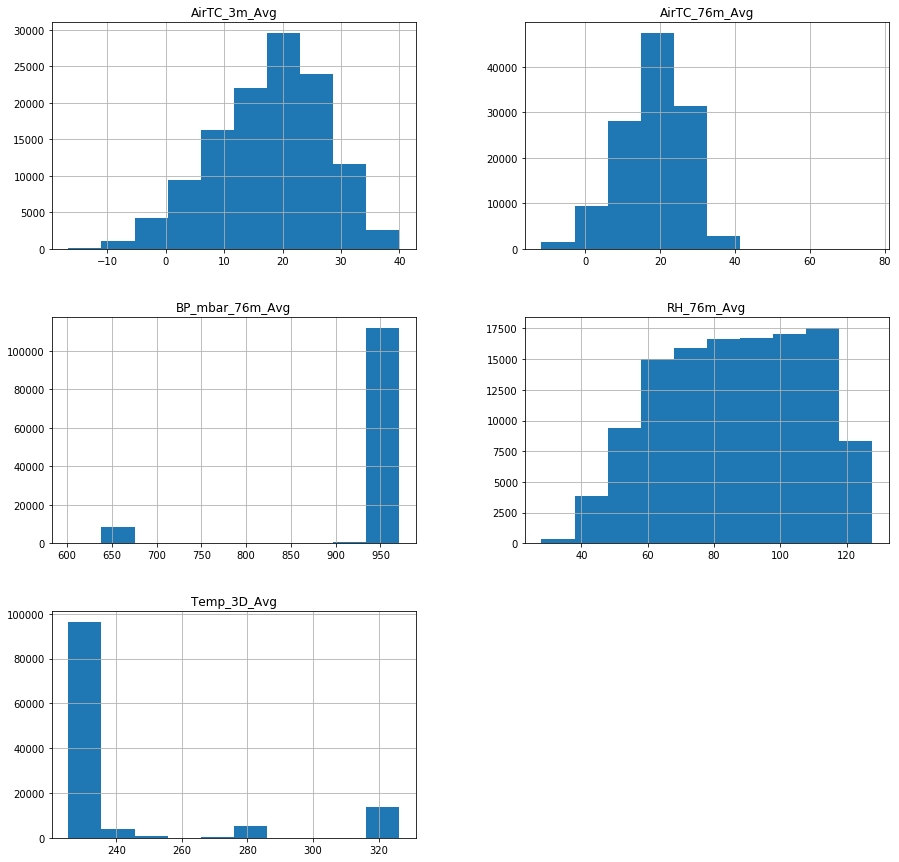

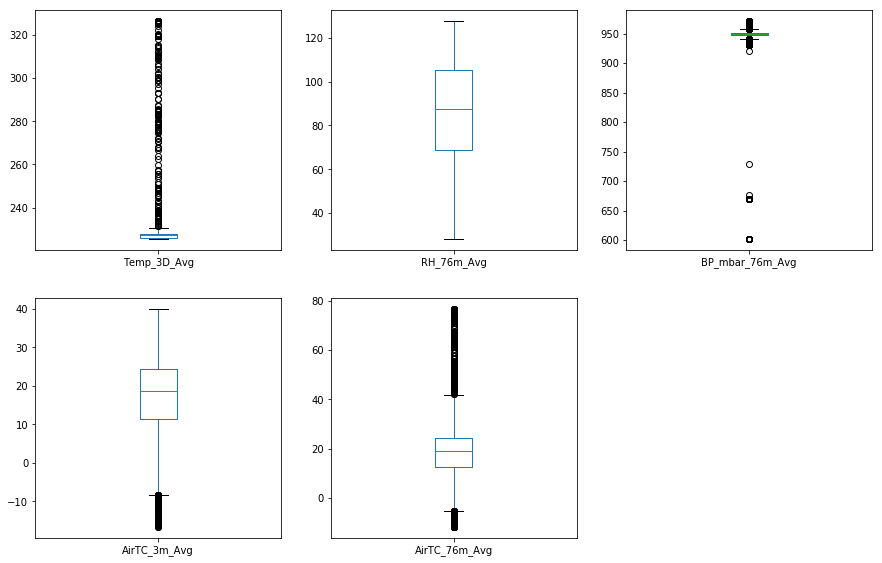

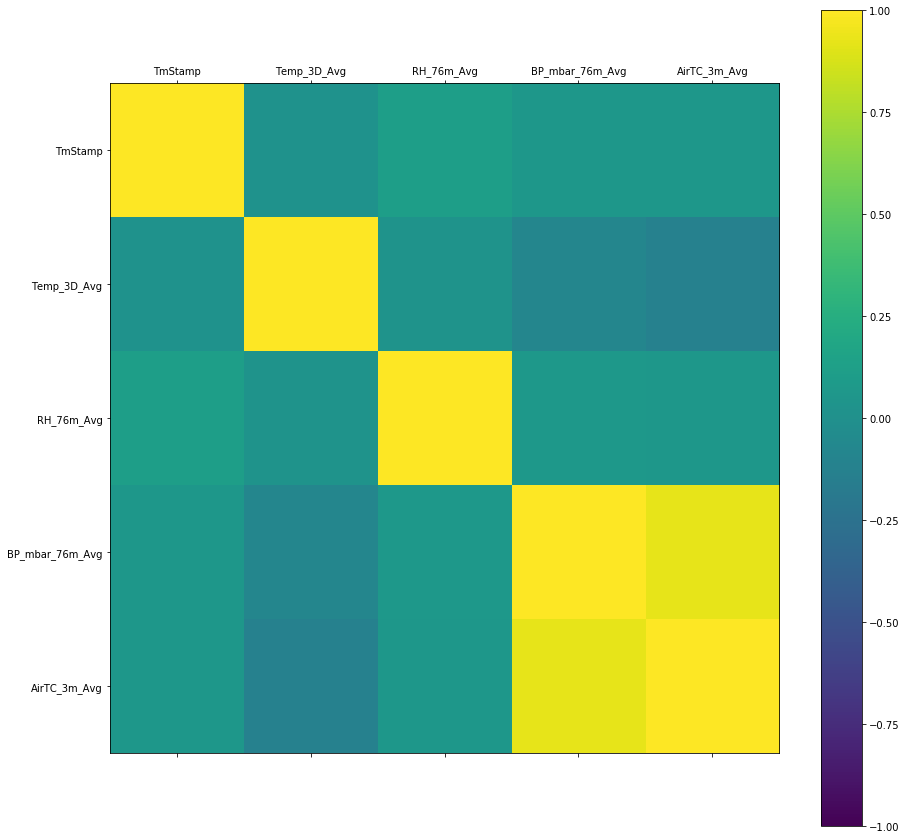

In [45]:
#Plots of interesting values. 
#Code From: https://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/
df.hist(figsize=(15,15))
plt.show()

df.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,15), sharex=False, sharey=False)
plt.show()

names = ['TmStamp', 'Temp_3D_Avg', 'RH_76m_Avg', 'BP_mbar_76m_Avg', 'AirTC_3m_Avg','AirTC_76m_Avg']
correlations = df.corr()
# plot correlation matrix
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()



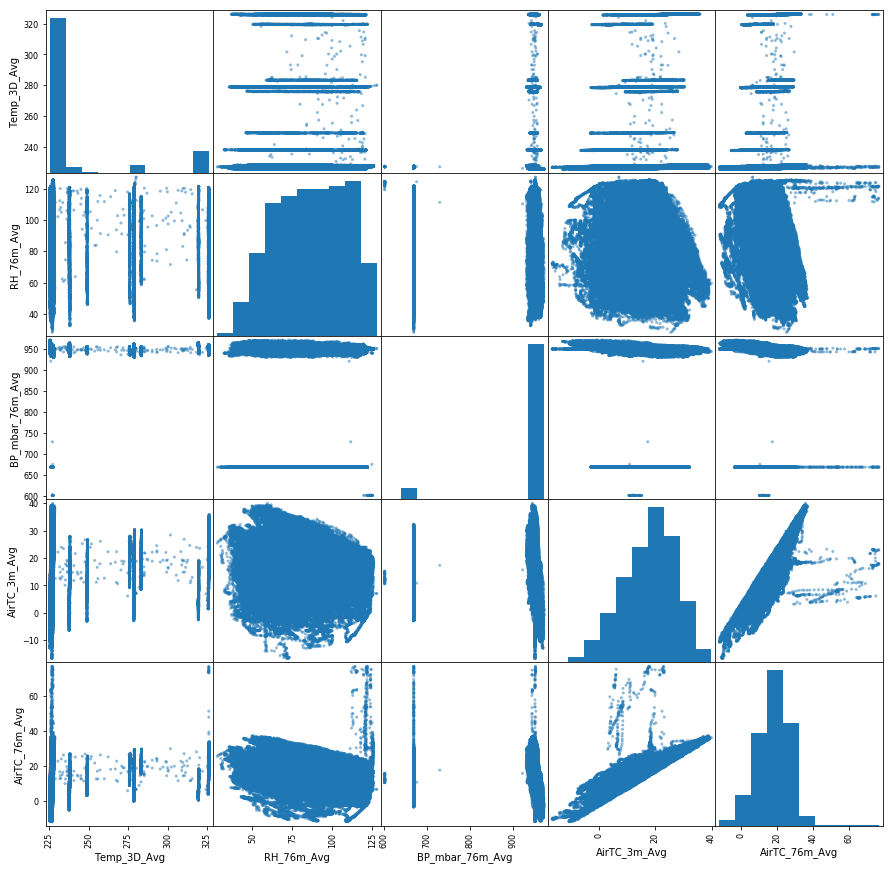

In [47]:
#more plots
scatter_matrix(df, figsize=(15,15))
plt.show()